In [40]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [41]:
data = load_iris()
x = data.data
y = data.target
target_names = data.target_names
print("Original data shape:" , x.shape)

Original data shape: (150, 4)


In [42]:
scaler = StandardScaler()
x_Standardization = scaler.fit_transform(x)

In [43]:
minmax = MinMaxScaler()
x_normalized = minmax.fit_transform(x)

In [44]:
pca = PCA(n_components = 2)
x_pca = pca.fit_transform(x_Standardization)

In [45]:
print("\nExplained variance ratio:")
for i,var in enumerate (pca.explained_variance_ratio_):
  print(f"principal component{i + 1}:{var: 4f}")
print("\ncumulative  explained variance:",np.cumsum(pca.explained_variance_ratio_))


Explained variance ratio:
principal component1: 0.729624
principal component2: 0.228508

cumulative  explained variance: [0.72962445 0.95813207]


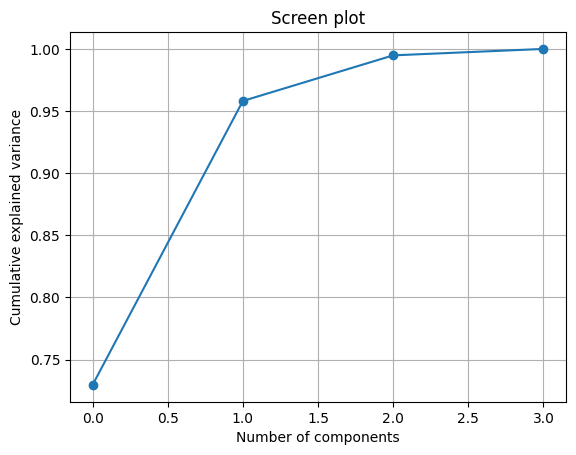

In [46]:
pca_full = PCA()
pca_full.fit(x_Standardization)
plt.figure()
plt.plot(np.cumsum(pca_full.explained_variance_ratio_),marker='o')
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Screen plot")
plt.grid()
plt.show()

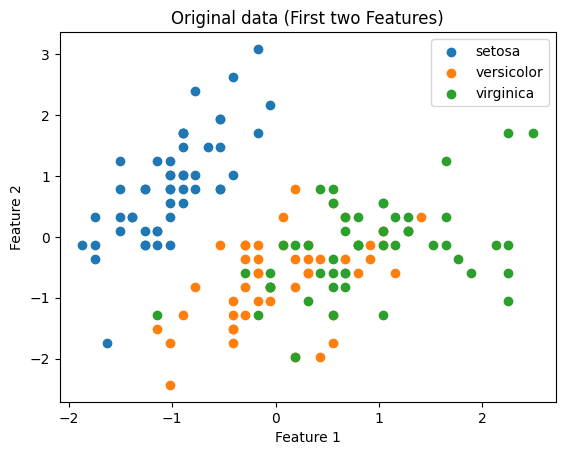

In [47]:
#original data
plt.figure()
for i,target in enumerate(target_names):
  plt.scatter(x_Standardization[y == i,0],x_Standardization[y == i,1], label = target)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Original data (First two Features)")
plt.legend()
plt.show()


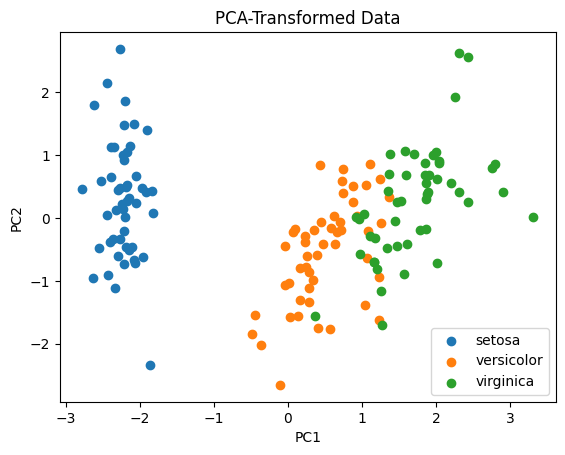

In [48]:
#PCA-transformed data
plt.figure()
for i,target in enumerate(target_names):
  plt.scatter(x_pca[y == i,0], x_pca[y == i,1] , label = target)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA-Transformed Data")
plt.legend()
plt.show()